<a href="https://colab.research.google.com/github/risabri/Predicting-Heart-Disease-/blob/main/Rya_545_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Final Project

**Due Date: **December 11, 2023 by 10:00 PM EST

**Author: Nico Tripeny, Rita Sabri, Rya Liu**

# Introduction

Heart disease is a prevalent and life-threatening health condition that affects millions of people worldwide. To address this pressing public health issue, our project aims to gain a deeper understanding of the factors that contribute to heart disease and the potential comorbidities associated with it. We will investigate various aspects, including dietary habits, mental health, lifestyle choices, and other relevant factors, to uncover potential connections to cardiovascular health.

The dataset used for this project can be found here:
https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

# Objectives
Our primary objectives for this project are as follows:

**Exploration and Analysis**: Utilize advanced data analysis techniques, including machine learning models, to explore the multifaceted aspects of heart disease.

**Prediction**: Investigate the feasibility of predicting the risk of heart disease based on a range of features, including lifestyle choices and health-related data.

**Feature Importance**: Determine the significance of different features in predicting heart disease, which will aid in understanding how specific factors contribute to the risk of developing this condition.

**Recommendations**: Provide recommendations and insights into potential lifestyle changes or interventions that can help reduce the risk of heart disease based on our findings.

# Methodology
To achieve our objectives, we will employ a combination of data analysis, machine learning, and data visualization techniques. Our project will involve the following key steps:

**Data Collection and Preparation**
We will gather relevant datasets containing information on individuals' health profiles, dietary habits, mental health, lifestyle choices, and more. These datasets will serve as the foundation for our analysis.

**Exploratory Data Analysis (EDA)**
Through EDA, we will conduct preliminary investigations to gain insights into the data, identify patterns, and discover potential correlations between different factors and heart disease.

**Machine Learning Models**
We will employ various machine learning models including logistic regression, random forrest and XGBoost Tree to build predictive models for heart disease. By training these models on our dataset, we aim to create tools that can assess an individual's risk of developing heart disease.

**Feature Importance Analysis**
Understanding the importance of different features in predicting heart disease is crucial. We will employ techniques such as feature importance ranking to determine the relative significance of various factors.

**Recommendations**
Based on our analysis and findings, we will provide evidence-based recommendations for individuals and healthcare professionals to help reduce the risk of heart disease and promote cardiovascular health.

# Conclusion
In summary, our CIS 5450 Final Project is dedicated to exploring the complex web of contributors and comorbidities of heart disease. Through data analysis and machine learning, we aim to shed light on the key factors influencing heart health and offer valuable insights into preventing and managing this critical health issue. By the project's conclusion, we anticipate providing actionable recommendations that can make a positive impact on public health.




# **Part 0:** Imports/Setup
Run the following cells to set up the notebook.


In [ ]:
# setup toolkits
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import re
import math
import random
import time
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
!pip install sqlalchemy==1.4.46
!pip install --upgrade pandasql
import pandasql as ps

# **Part I:** Data Cleaning and Wrangling

## **1.1** Data Loading and preprocessing

### **1.1.1** Read and Load Data


We will first import the data and begin examining its contents to see what preprocessing is neccessary.

In [ ]:
# read csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/545_project/CVD_cleaned.csv")

In [ ]:
(data.head())

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


From looking at the head of the dataframe, we can see that most of the variables are currently categorical. A large amount appear specifically to be binary, with "General_Health", "Checkup", and "Age_Category" appearing to be the only categorical variables with many different values

### **1.1.2** Checking for null values

While our initial examination indicates that there are no direct null values in the dataset, it is crucial to perform a more comprehensive check to ensure data integrity. In this phase, we go beyond traditional null checks and look for any unexpected values, including instances where data might be represented as "Null" or other unexpected placeholders.

In [ ]:
 #Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Checking if there are any null values in the dataset or not
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In addition to traditional null values, we are attentive to the presence of any unexpected string values, such as "Null" or other non-standard placeholders. These unexpected values can emerge due to data entry errors or inconsistencies and need to be identified and addressed to maintain data accuracy. We achieve this step by presenting all possible options for the categorical variables and checking if the content of numerical columns is numerical and non-negative only.

In [ ]:
for col in data.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(data[col].unique())
    print('\n', '-'*80, '\n')

Column name: General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 -------------------------------------------------------------------------------- 

Column name: Checkup
['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

 -------------------------------------------------------------------------------- 

Column name: Exercise
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Heart_Disease
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Skin_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Other_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Depression
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name:

As we can see, most are binary with four exceptions. For Diabetes, we will later make it binary by making 'No, pre-diabetes or borderline diabetes' into 'No' and 'Yes, but female told only during pregnancy' into 'Yes'.

In [ ]:
print(data.dtypes)

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [ ]:
print(data.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

From above we can see the values for the numerical columns are all numerical and non-negative. Some of the max values are very large, but without a better understanding of the scale we have no reason to remove them.

## **1.2** Data Cleaning
Our initial step in this data analysis journey is to ensure that our dataset is in the right format and that the data within it aligns with our analytical needs.

For both general health and checkup, we put them on an evenly spaced, five point scale as that feels most natural given the options. Since the 'Age_Categories' are evenly spaced every five years, we also simply map those to the numbers 1-13.

For diabetes, we convert everything to yes and no based on the first word in the discription. All binary variables, including sex in the data, are transformed to 0 and 1, with 'no' and 'male' being 0 and 'yes' and 'female' being 1.



### **1.2.1** Cleaning the Diabetes column
Since the original "Diabetes" column may contain various descriptions related to diabetes, which can introduce complexity and inconsistency.To enhance data consistency and usability, we are simplifying the values in this column to either "Yes" or "No" based on the first word in the description.

In [ ]:
# Split the string at the comma and keep only the first part
data['Diabetes'] = data['Diabetes'].str.split(',').str[0]

# Check the unique values in the Diabetes column to confirm the change
print(data['Diabetes'].unique())

['No' 'Yes']


### **1.2.2** Transposing the categorical variables to numerical

In this step, we address the categorical variables within our dataset by translating them into numerical representations. This transformation is essential for enabling mathematical analyses and modeling. We begin by identifying the categorical variables that require this conversion:

In [ ]:
binary_features = ['Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Smoking_History']
# Define a mapping for 'General_Health'
general_health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}


To achieve this transformation, we define specific mappings for each categorical variable:

In [ ]:
# Define a mapping for 'Checkup'
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
}

age_category_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80+': 13
}

In [ ]:
data_cleaned = data.copy()

# Apply the mapping to the 'General_Health' column
data_cleaned['General_Health'] = data_cleaned['General_Health'].map(general_health_mapping)

# Apply the mapping to the 'Checkup' column
data_cleaned['Checkup'] = data_cleaned['Checkup'].map(checkup_mapping)

# Apply the mapping to the 'age' column
data_cleaned['Age_Num'] = data_cleaned['Age_Category'].map(age_category_mapping)

In [ ]:
age_50_plus_count = data_cleaned[data_cleaned['Age_Num'] >= 7].shape[0]
print("Number of individuals aged 50+:", age_50_plus_count)


Number of individuals aged 50+: 193082


For binary features and the "Sex" column, we transform values as follows:

Binary features like "Yes" and "No" are converted to 1 and 0, respectively, enabling binary analyses.

The "Sex" column values are transformed to 1 for "Female" and 0 for "Male."

In [ ]:
for col in binary_features:
    data_cleaned[col] = data_cleaned[col].map({'Yes': 1, 'No': 0})
data_cleaned['Sex'] = data_cleaned['Sex'].map({'Female': 1, 'Male': 0})

In [ ]:
female_count = data_cleaned['Sex'].sum()
print("Number of females:", female_count)

Number of females: 160196


In [ ]:
male_count = len(data_cleaned) - data_cleaned['Sex'].sum()
print("Number of males:", male_count)


Number of males: 148658


Finally, we specify the target variable as "Heart_Disease," and we define the feature set.

In [ ]:
target = "Heart_Disease"
features = [i for i in data_cleaned.columns if i!= target]

In [ ]:
print(data_cleaned)

        General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0                    1        3         0              0            0   
1                    4        4         0              1            0   
2                    4        4         1              0            0   
3                    1        4         1              1            0   
4                    3        4         0              0            0   
...                ...      ...       ...            ...          ...   
308849               4        4         1              0            0   
308850               2        2         1              0            0   
308851               4        1         1              0            0   
308852               4        4         1              0            0   
308853               5        4         1              0            0   

        Other_Cancer  Depression  Diabetes  Arthritis  Sex Age_Category  \
0                  0           0         0      

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

We see that now all variables are numerical except for "Age_Category". While "Age_Category" remains valuable for initial Exploratory Data Analysis (EDA) purposes, it will be phased out in subsequent parts of the project to streamline focus.

## **PART II:** EDA

Exploratory Data Analysis (EDA) is a foundational approach used to delve into datasets, aiming to summarize their key characteristics, often through visual methods. It goes beyond formal modeling and hypothesis testing, allowing us to uncover insights and patterns hidden within the data.

##**2.1** General Data Exploration
In this section, we embark on a comprehensive exploration of our dataset, seeking to gain a holistic understanding of its main attributes. To facilitate this exploration, we provide a summary of key statistics for each variable, including measures of central tendency and dispersion.

###**2.1.1** General Data Exploration Description

In [ ]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
General_Health,308854.0,3.530448,1.031224,1.00,3.00,4.00,4.00,5.00
Checkup,308854.0,3.617981,0.815120,0.00,4.00,4.00,4.00,4.00
Exercise,308854.0,0.775062,0.417542,0.00,1.00,1.00,1.00,1.00
Heart_Disease,308854.0,0.080850,0.272606,0.00,0.00,0.00,0.00,1.00
Skin_Cancer,308854.0,0.097114,0.296113,0.00,0.00,0.00,0.00,1.00
Other_Cancer,308854.0,0.096738,0.295602,0.00,0.00,0.00,0.00,1.00
Depression,308854.0,0.200422,0.400316,0.00,0.00,0.00,0.00,1.00
Diabetes,308854.0,0.138632,0.345563,0.00,0.00,0.00,0.00,1.00
Arthritis,308854.0,0.327245,0.469208,0.00,0.00,0.00,1.00,1.00
Sex,308854.0,0.518679,0.499652,0.00,0.00,1.00,1.00,1.00


📊Takeaway:
We are going to make general insight of the data that we have, taking into consideration the standart deviation for each of our 7 features to have a general understandement:

**Height (in cm)**
Average height is about 170.62 cm.
The standard deviation is 10.66 cm, indicating moderate variability in height.
Heights range from a minimum of 91 cm to a maximum of 241 cm.

**Weight (in kg)**
Average weight is approximately 83.59 kg.
The standard deviation of 21.34 kg suggests a wide range in body weights.
Weights range from 24.95 kg to 293.02 kg.

**BMI (Body Mass Index)**
Average BMI is 28.63, which is in the overweight category according to WHO standards.
The standard deviation is 6.52, indicating a varied range of body compositions.
BMI ranges from 12.02 (underweight) to 99.33 (extremely obese).

**Alcohol Consumption (frequency per month)**
On average, individuals consume alcohol about 5 times per month.
A high standard deviation (8.20) implies significant variation in alcohol consumption habits.
The range is from 0 (no consumption) to 30 times per month.

**Fruit Consumption (days per month)**
The average days per month people consume fruit is about 29.84.
A large standard deviation (24.88) suggests diverse fruit consumption habits.
Ranges from no fruit consumption at all to daily consumption.

**Vegetables Consumption (days per month)**
On average, vegetables are consumed on 15.11 days per month.
The standard deviation (14.93) indicates a wide variation in vegetable consumption habits.
Consumption varies from none at all to daily.

**Potato Consumption (days per month)**
People consume potatoes on average 6.30 days per month.
The standard deviation of 8.58 suggests diverse potato consumption patterns.
The range is from no consumption to daily consumption.






### **2.1.2** Data Distribution
In this section of our exploratory data analysis, we focus on the distribution of each variables. We aim to gain insights into disease prevalence, general participants properties, and lifestye trend.

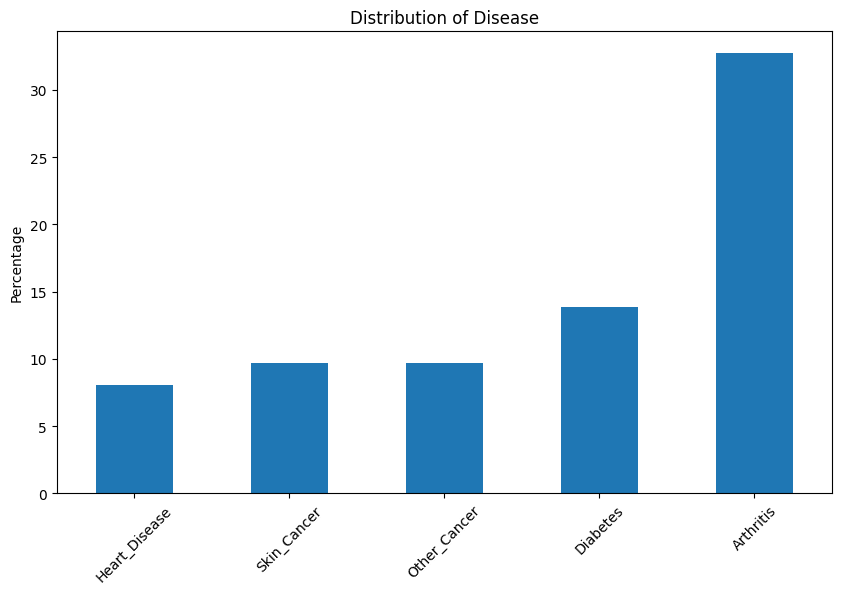

In [ ]:
disease_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

# Count of each disease in data_cleaned
disease_counts = data_cleaned[disease_columns].sum()
# Calculate the percentage of each disease in data_cleaned
disease_percentages = (data_cleaned[disease_columns].sum() / len(data_cleaned)) * 100

# Plot the distribution of each disease as a percentage
disease_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Disease')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


📊Takeaway :
- From our analysis, Arthesis is the most prevalent type of sickness with around 35% prevalence rate, while other disease are approximately evenly distributed. Heart disease has the lowest prevalence which is under 10%.

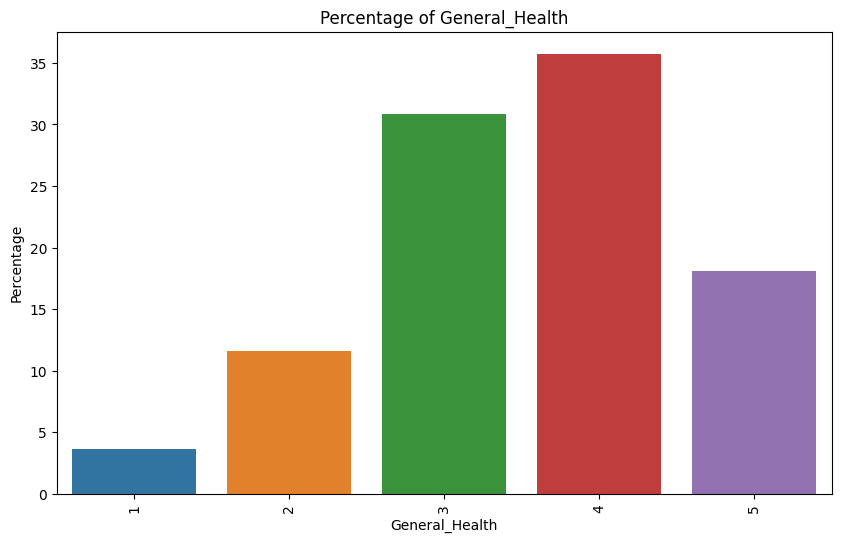

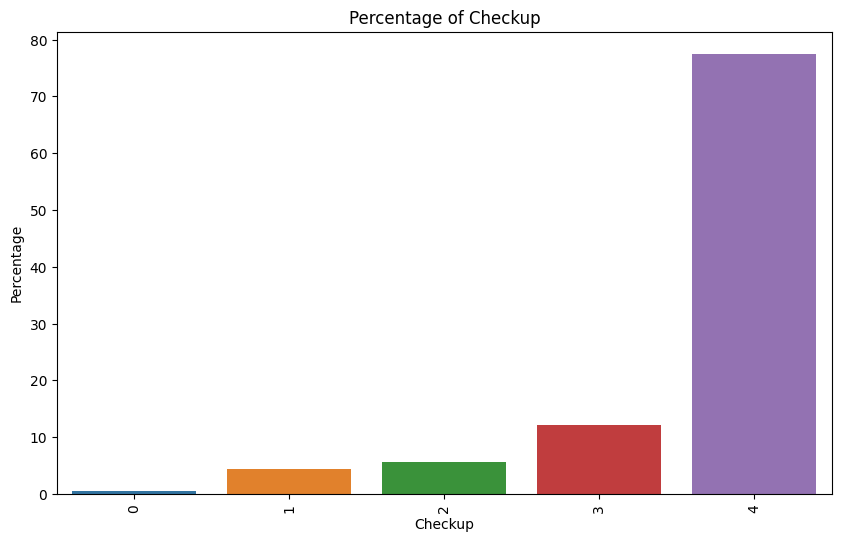

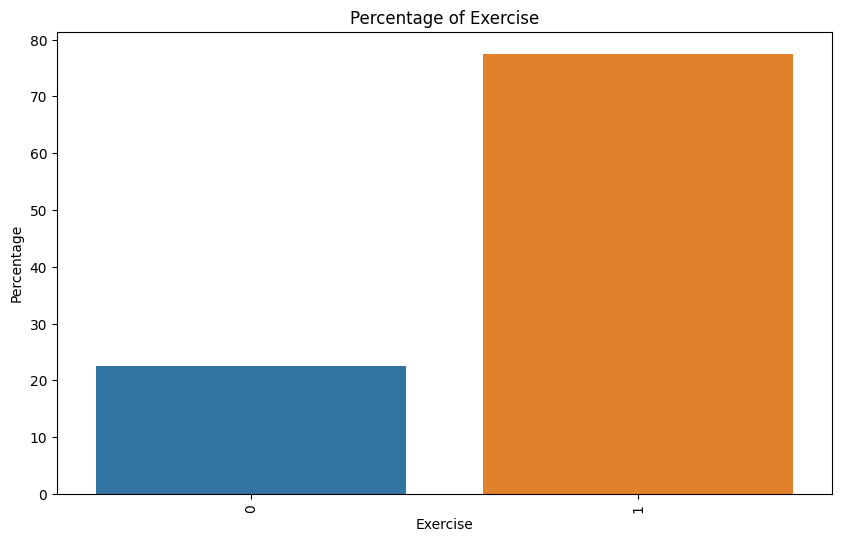

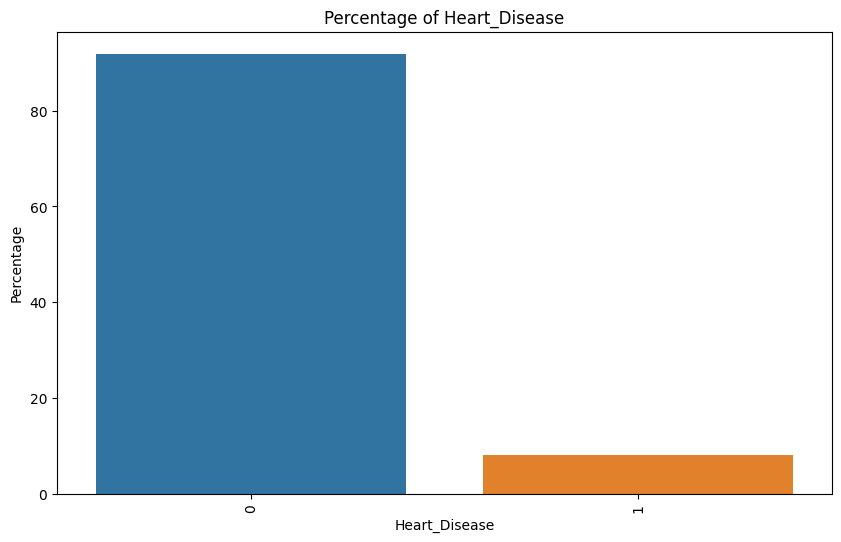

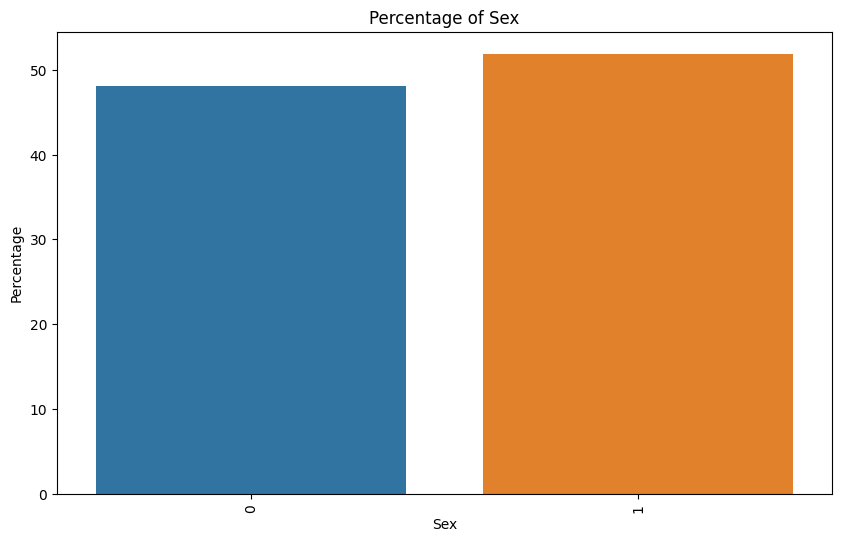

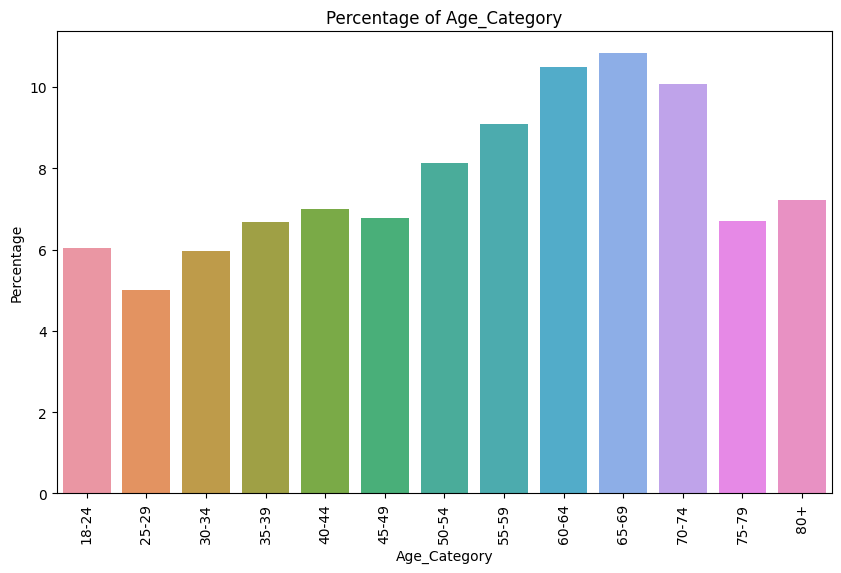

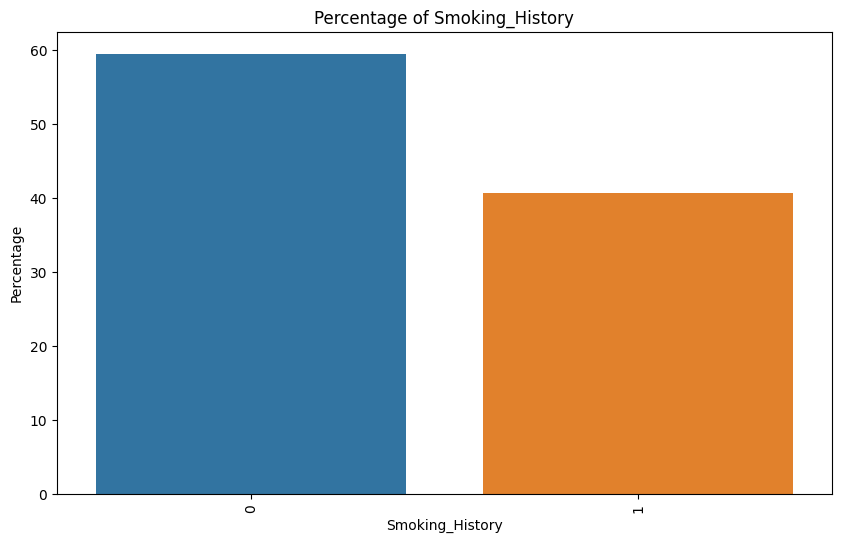

In [ ]:
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))

    # SQL query to calculate the percentage of each category
    query = f"""
    SELECT
        {feature},
        COUNT(*) * 100.0 / (SELECT COUNT(*) FROM data_cleaned) as Percentage
    FROM
        data_cleaned
    GROUP BY
        {feature}
    """
    counts = ps.sqldf(query, locals())

    # Use barplot to display the percentages
    sns.barplot(data=counts, x=feature, y='Percentage')

    plt.title('Percentage of ' + feature)
    plt.xticks(rotation=90)
    plt.ylabel('Percentage')

    plt.show()


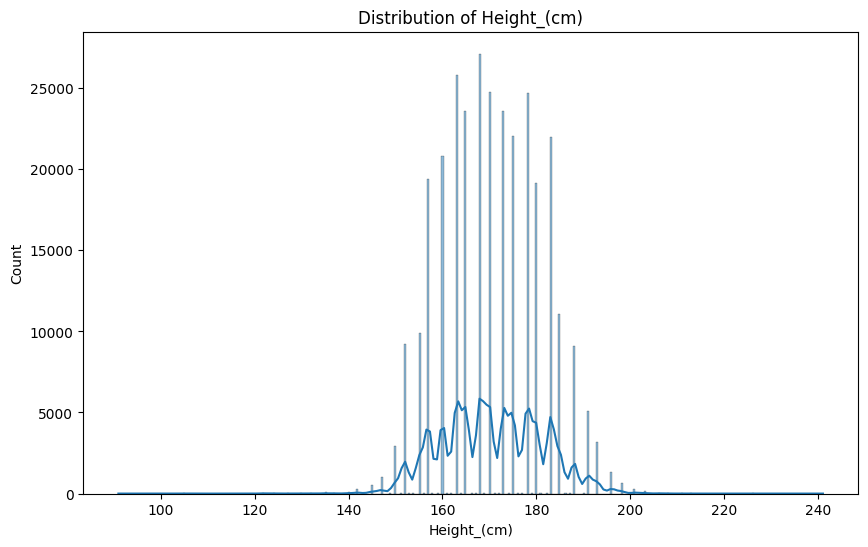

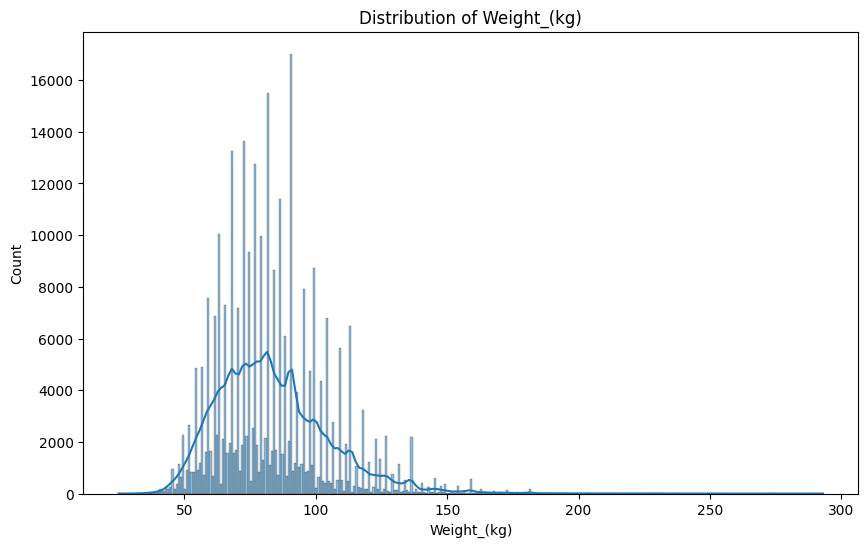

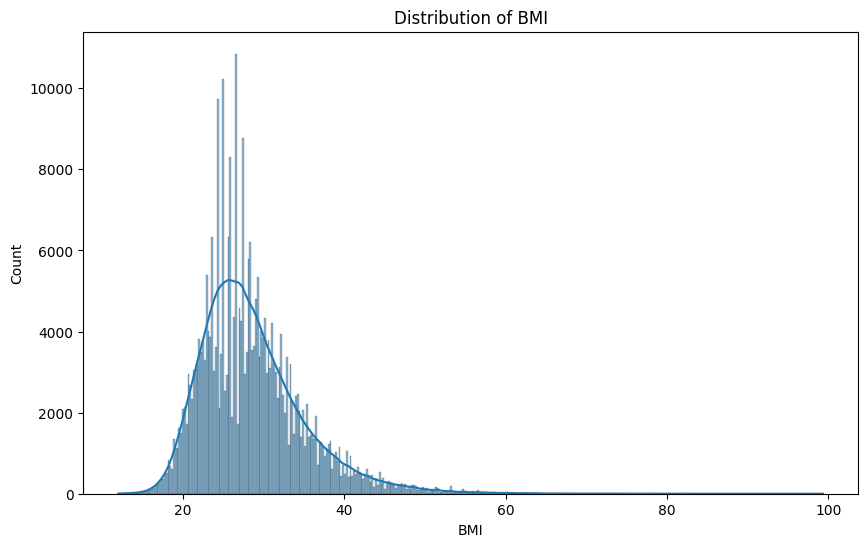

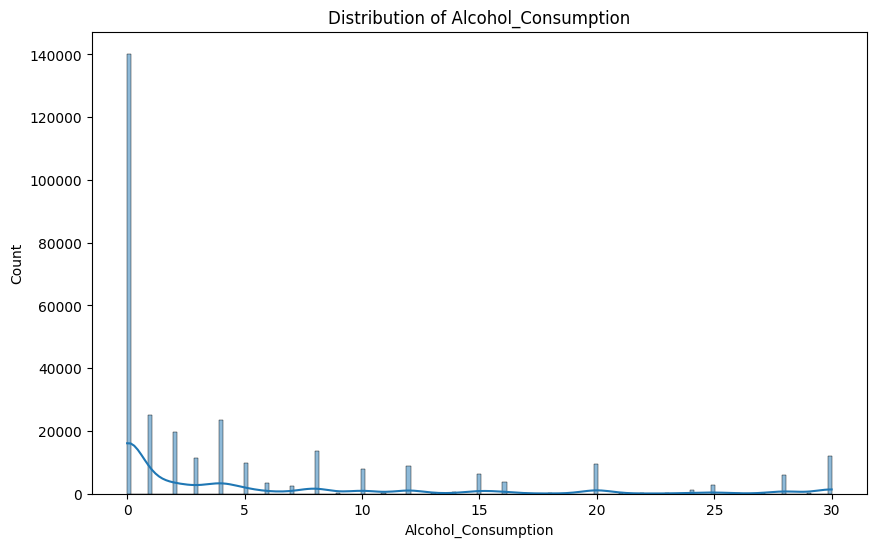

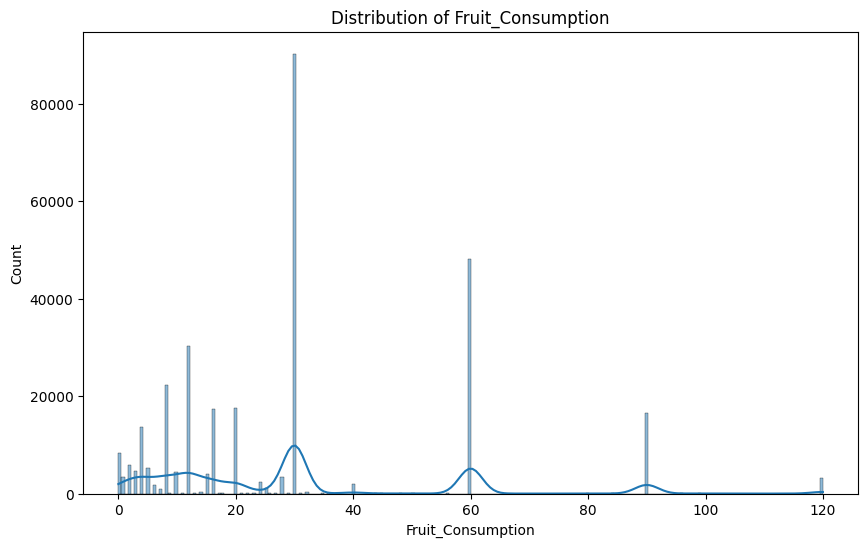

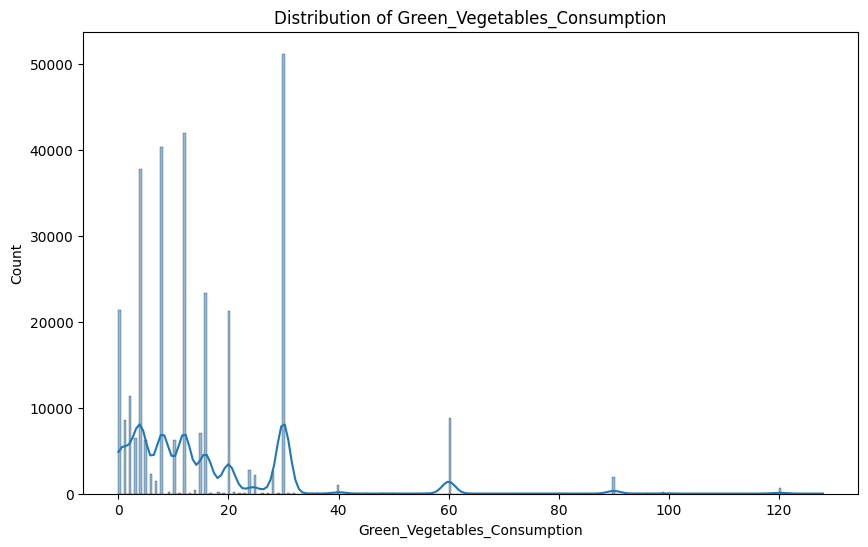

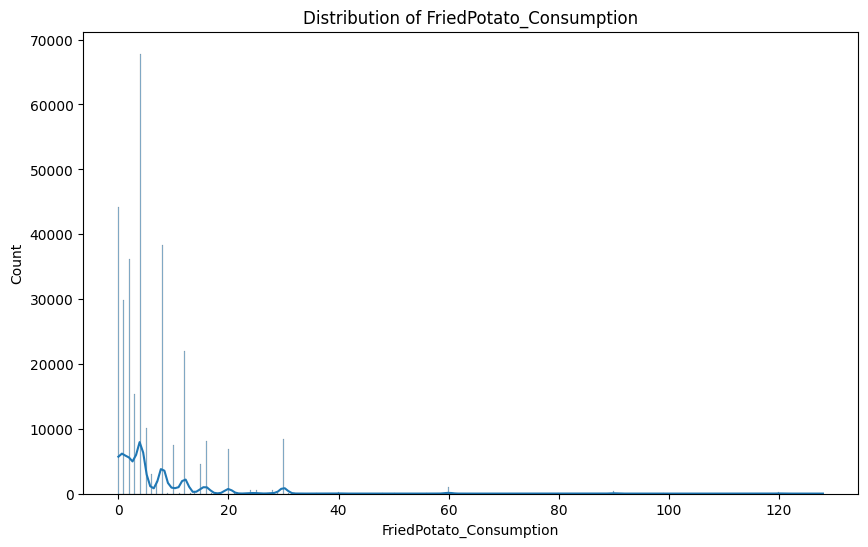

In [ ]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_cleaned, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

📊**Takeaway** Here we can come up a couple general perspective of the participants and their lifestyle habits:
1.  Most people reported according to the health checkup within a year
2.  Majority group having "good" or "very good" health status (Even though the scale for such evaluation is unsure, could be self reported)
3. Almost 80% of the participants have excercise habit
4. The prevalence of our target variable - heart disease - is low which is below 10%.
5. Sex is about evenely distributed, with slightly more female
6. Participants age are more distributed within 50-74 range.
7. Smoking History is moderately low among the particiants for around 40%.
8. The height is mostly between 155 - 185 cm
9. Weight mostly distribute in 50-140 kg
10. BMI concentrate the most around 25 but with upper limit up to 50+
11. Most people don't drink or drink in a resonable range. Despite some extreme outliers indication heavy drinkers.
12. Despite the overall high fuits intake and low fried potatoes intake, the result show a general insufficient vegetable intake.





##**2.2** Heart Disease Feature Analysis
In this section, we embark on an in-depth exploration of heart disease and its associated features within our dataset. Heart disease is a complex and critical health condition, and understanding its relationship with various factors is paramount. Our analysis in this section aims to provide a comprehensive overview of heart disease and its associations with various lifestyle, behavioral, and demographic factors. Our goal is to unravel the intricate web of features contributing to heart disease, ultimately contributing to a deeper understanding of cardiovascular health.

### **2.2.1** Age and Heart Disease
We examine how gender influences the occurrence of heart disease, shedding light on any gender-specific patterns or disparities.

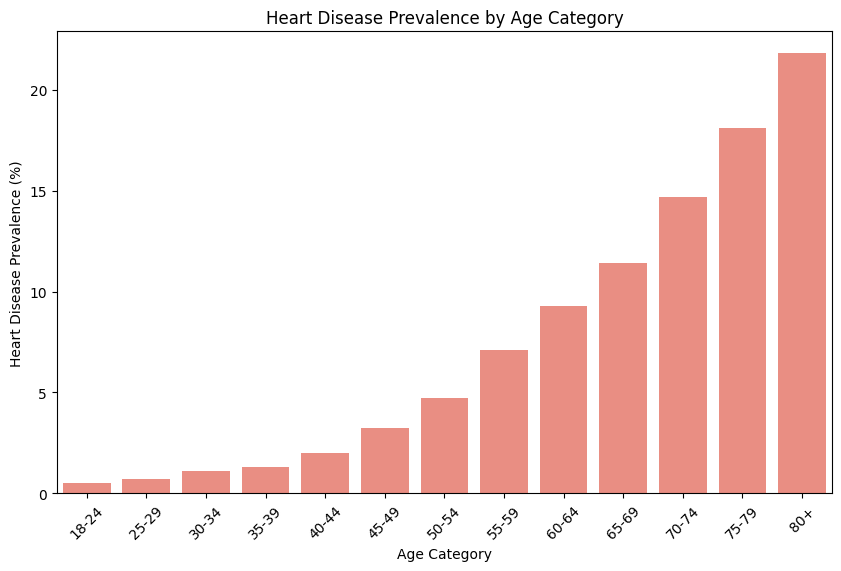

In [ ]:
# List of age categories
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

# Initialize an empty list to store prevalence data
heart_disease_data = []

# Calculate the prevalence of heart disease for each age category
for age_cat in age_categories:
    # Filter the DataFrame for the current age category
    age_group = data_cleaned[data_cleaned['Age_Category'] == age_cat]
    if not age_group.empty:
        # Calculate the prevalence (percentage) of heart disease in the current age group
        prevalence = age_group['Heart_Disease'].mean() * 100
    else:
        prevalence = 0

    # Append the result to the heart_disease_data list
    heart_disease_data.append({'Age_Category': age_cat, 'Heart_Disease_Prevalence': prevalence})

# Convert the list of dictionaries to a DataFrame
heart_disease_df = pd.DataFrame(heart_disease_data)

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', data=heart_disease_df, color='salmon')
plt.title('Heart Disease Prevalence by Age Category')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()

### **2.2.2** Gender and Heart Disease
We examine how gender influences the occurrence of heart disease, shedding light on any gender-specific patterns or disparities.

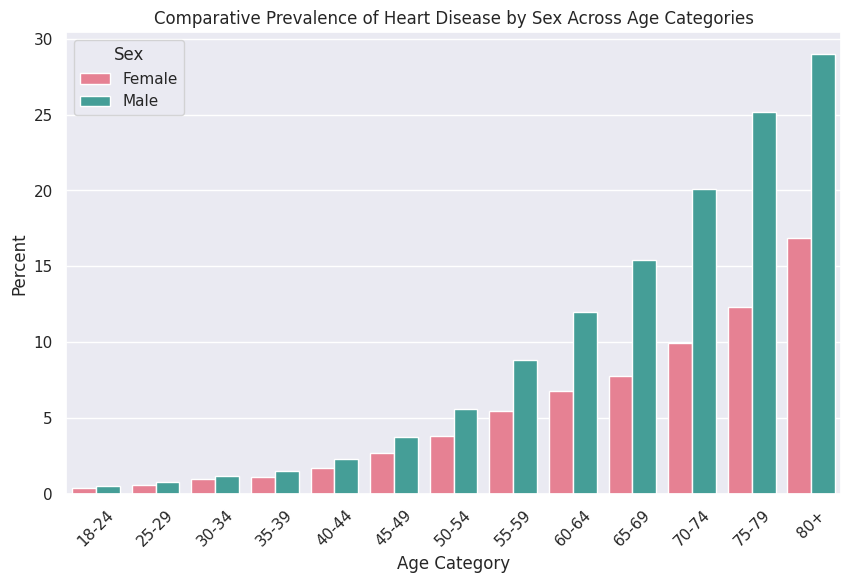

In [ ]:
# Set the figure size for the plot
sns.set(rc={"figure.figsize":(10, 6)})



# Initialize lists to store the data
age = []
sex = []
percent = []

# Iterate over each age category to calculate the percentage
for i in age_categories:
    # Filtering data by each age category
    aged_female = data_cleaned[(data_cleaned['Age_Category'] == i) & (data_cleaned['Sex'] == 1)]
    aged_male = data_cleaned[(data_cleaned['Age_Category'] == i) & (data_cleaned['Sex'] == 0)]

    percent_female = (aged_female['Heart_Disease'].sum() / len(aged_female) * 100) if len(aged_female) > 0 else 0
    percent_male = (aged_male['Heart_Disease'].sum() / len(aged_male) * 100) if len(aged_male) > 0 else 0

    # Append the results to the lists
    age.extend([i, i])
    sex.extend(['Female', 'Male'])
    percent.extend([percent_female, percent_male])

# Create a DataFrame for plotting
data_test = pd.DataFrame({'Age Category': age, 'Sex': sex, 'Percent Have Heart Disease': percent})

# Create the barplot
ax = sns.barplot(x="Age Category", hue="Sex", y="Percent Have Heart Disease", data=data_test, palette='husl', order=age_categories)
ax.set(ylabel="Percent")
ax.set(title="Comparative Prevalence of Heart Disease by Sex Across Age Categories")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if necessary
plt.legend(title='Sex')
plt.show()


📊**Takeaway**

 The prevalence of heart disease generally increases with age for both sexes. This is consistent with medical knowledge that the risk of heart disease rises as people get older.

Among all age group, there is an obvious differences in the prevalence of heart disease between males and females. Typically, males have a higher risk of heart disease, which is also often reflected in the data.

### **2.2.3** Heart Disease and Smoking
We explore the relationship between smoking habits and heart disease, investigating whether smoking is a contributing factor to cardiovascular health.

We want to further investigate what kind of lifestyle risk factor triggers a difference in heart disease.

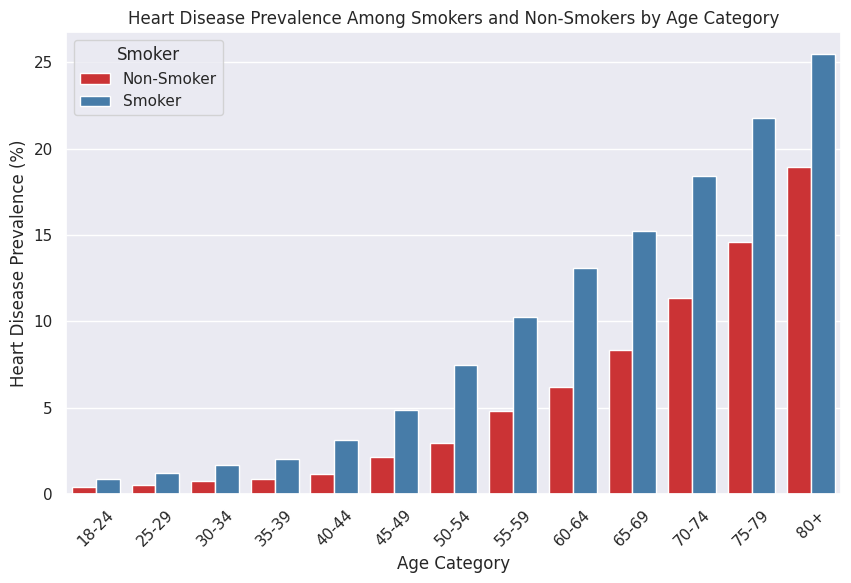

In [ ]:
heart_disease_data = []

for age_cat in age_categories:
    for smoker_status in [0, 1]:  # 0 for Non-Smokers, 1 for Smokers
        subgroup = data_cleaned[(data_cleaned['Age_Category'] == age_cat) & (data_cleaned['Smoking_History'] == smoker_status)]
        prevalence = subgroup['Heart_Disease'].mean() * 100 if not subgroup.empty else 0
        heart_disease_data.append({'Age_Category': age_cat, 'Smoker': 'Smoker' if smoker_status == 1 else 'Non-Smoker', 'Heart_Disease_Prevalence': prevalence})

heart_disease_df = pd.DataFrame(heart_disease_data)


# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', hue='Smoker', data=heart_disease_df, palette='Set1')
plt.title('Heart Disease Prevalence Among Smokers and Non-Smokers by Age Category')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()


📊**Takeaway**

Both smokers and non-smokers show an increase in heart disease prevalence with age. This trend is expected as the risk of heart disease typically increases as people get older.

There appears to be a higher prevalence of heart disease among smokers across all age categories when compared to non-smokers. This suggests a potential link between smoking and heart disease, aligning with widespread medical evidence that smoking is a significant risk factor for heart disease.

### **2.2.4** Heart Disease and Alcohol Consumption
Our analysis assesses the impact of alcohol consumption on heart disease, helping us understand how drinking habits correlate with this condition.

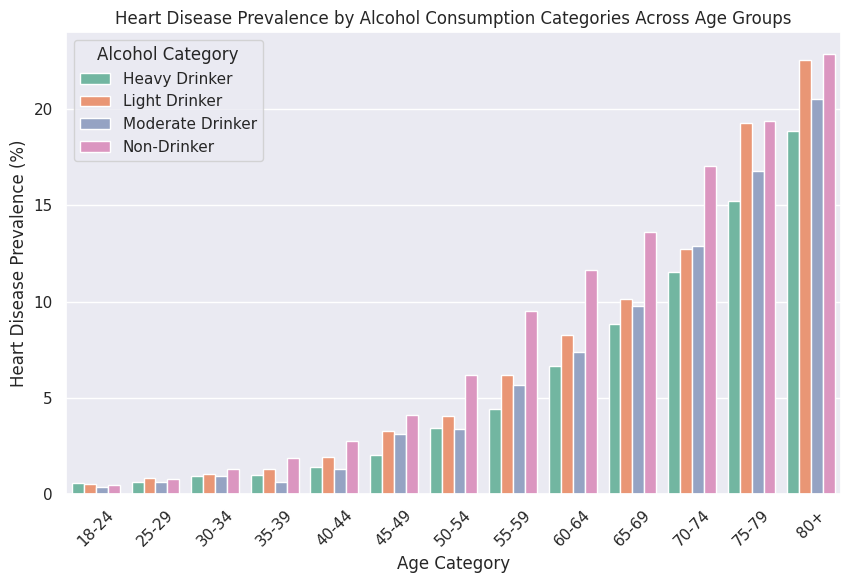

In [ ]:
# Set the figure size for the plot
sns.set(rc={"figure.figsize":(10, 6)})

# List of age categories
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
results = []

# SQL query template for each age category and alcohol consumption category
query_template = '''
    SELECT
        '{age_category}' as Age_Category,
        CASE
            WHEN Alcohol_Consumption = 0 THEN 'Non-Drinker'
            WHEN Alcohol_Consumption <= 2 THEN 'Light Drinker'
            WHEN Alcohol_Consumption <= 4 THEN 'Moderate Drinker'
            ELSE 'Heavy Drinker'
        END as Alcohol_Category,
        AVG(CASE WHEN Heart_Disease = 1 THEN 100.0 ELSE 0 END) as Heart_Disease_Prevalence
    FROM
        data_cleaned
    WHERE
        Age_Category = '{age_category}'
    GROUP BY
        Age_Category, Alcohol_Category
'''

# Iterate over each age category
for age_category in age_categories:
    query = query_template.format(age_category=age_category)
    result = ps.sqldf(query, locals())
    results.append(result)

# Combine all results into a single DataFrame
heart_disease_alcohol_df = pd.concat(results)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', hue='Alcohol_Category', data=heart_disease_alcohol_df, palette='Set2')
plt.title('Heart Disease Prevalence by Alcohol Consumption Categories Across Age Groups')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.legend(title='Alcohol Category')
plt.show()


📊**Takeaway**

As with most heart disease data, there's likely an upward trend in prevalence with increasing age across all categories of alcohol consumption. This would be consistent with the general understanding that the risk of heart disease increases with age.

In all age groups, non-drinkers have the highest heart disease prevalence while heavy drinkers have the lowest, which surprisingly contradicts our common sense and recent researches asserting that alcohol would increase the risk for heart disease. However, this result does not suggest that drinking lower the heart disease risk.  For participants over 70 years old, non-drinkers have a similar prevalence of heart disease as compared to light drinkers, this could suggest that abstaining from alcohol might be associated with no additional risk of heart disease. However, this is a complex relationship since it also involved extra variable "age" and should be interpreted with caution.


### **2.2.5** Heart Disease and Excercise
We investigate the role of physical activity by analyzing how exercise habits relate to the presence or absence of heart disease.

In [ ]:
results = []

# SQL query template for each age category and exercise category
query_template = '''
    SELECT
        '{age_category}' as Age_Category,
        Exercise as Exercise_Category,
        AVG(CASE WHEN Heart_Disease = 1 THEN 100.0 ELSE 0 END) as Heart_Disease_Prevalence
    FROM
        data_cleaned
    WHERE
        Age_Category = '{age_category}'
    GROUP BY
        Age_Category, Exercise
'''

# Iterate over each age category
for age_category in age_categories:
    query = query_template.format(age_category=age_category)
    result = ps.sqldf(query, locals())
    results.append(result)

# Combine all results into a single DataFrame
heart_disease_exercise_df = pd.concat(results)




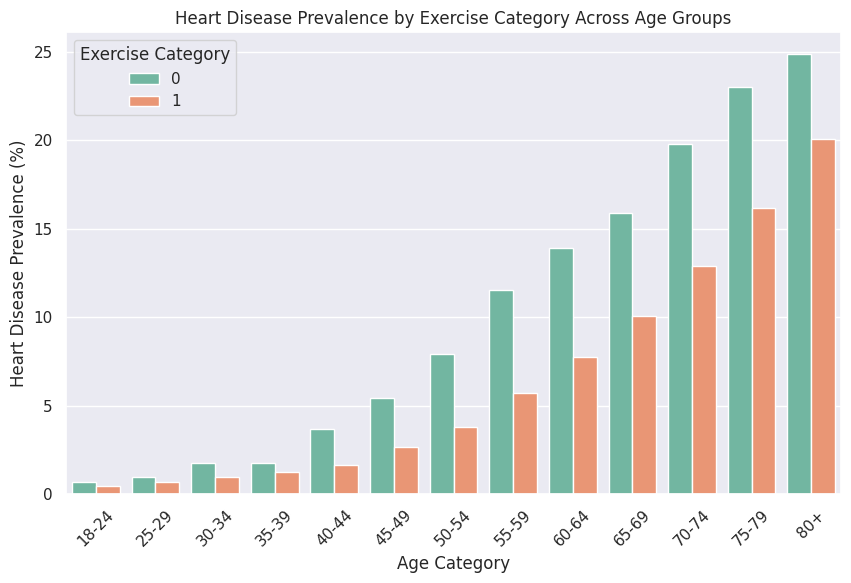

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', hue='Exercise_Category', data=heart_disease_exercise_df, palette='Set2')
plt.title('Heart Disease Prevalence by Exercise Category Across Age Groups')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.legend(title='Exercise Category')
plt.show()

📊**Takeaway**
The chart shows a lower prevalence of heart disease among individuals who exercise (represented as '1') compared to those who do not (represented as '0'), this could suggest a protective effect of physical activity against heart disease.

### **2.2.6** Heart Disease and Diet
In this section, we scrutinize dietary factors such as fruit consumption, vegetable consumption, and fried potato consumption to uncover their potential links to heart disease.

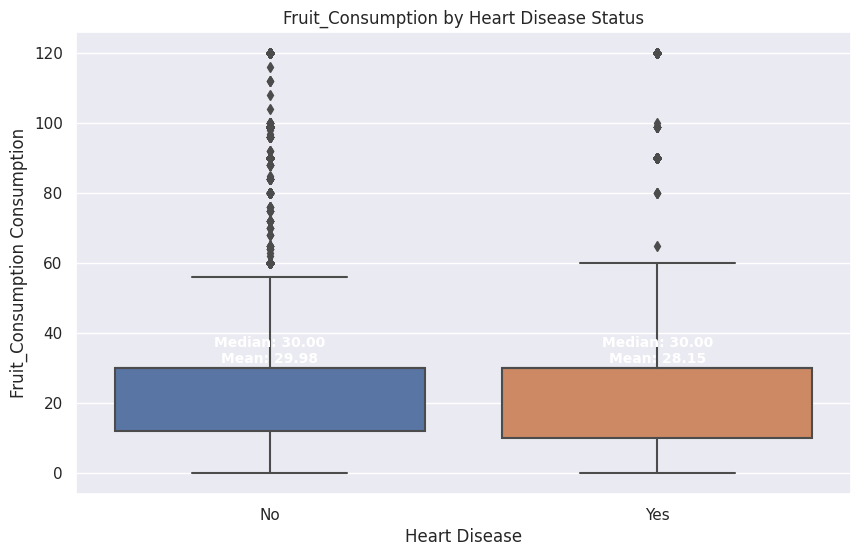

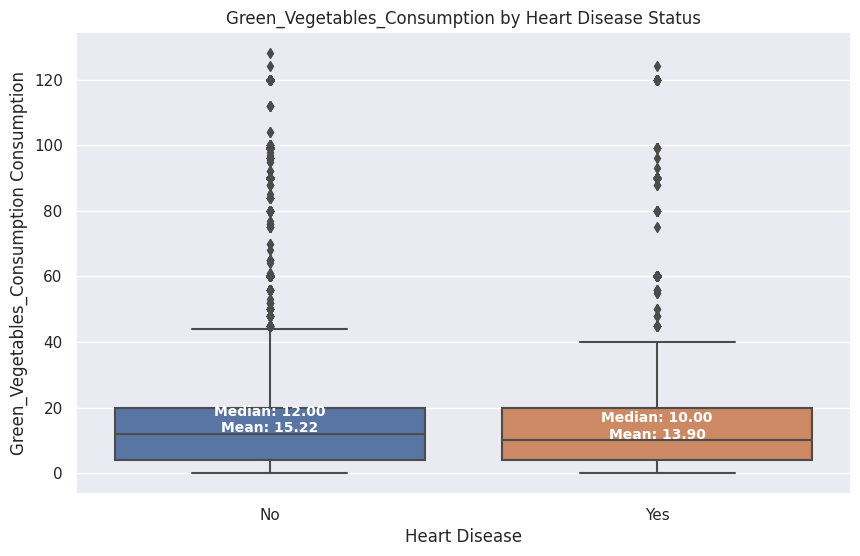

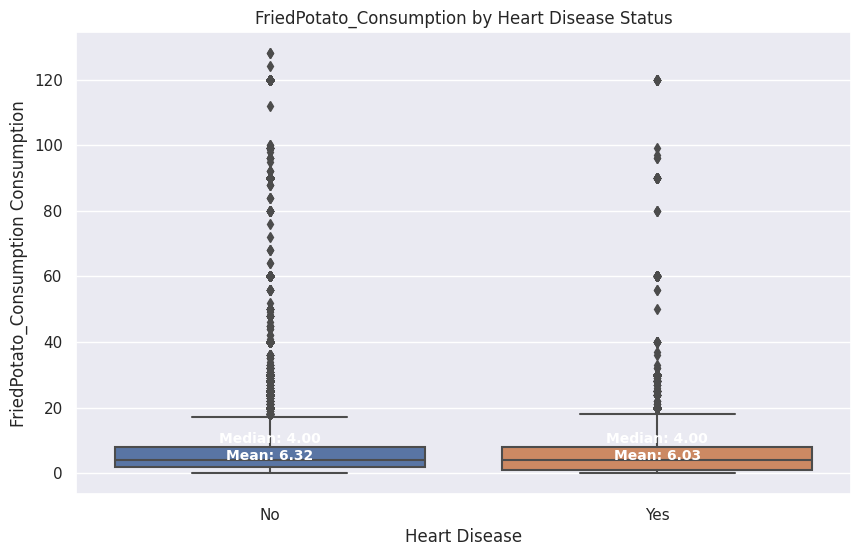

In [ ]:
for diet_factor in ['Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    plt.figure(figsize=(10, 6))
    boxplot = sns.boxplot(x='Heart_Disease', y=diet_factor, data=data)
    plt.title(f'{diet_factor} by Heart Disease Status')

    # Renaming x-axis labels
    boxplot.set_xticklabels(['No', 'Yes'])

    plt.xlabel('Heart Disease')
    plt.ylabel(f'{diet_factor} Consumption')

    # Adding annotations
    medians = data.groupby(['Heart_Disease'])[diet_factor].median()
    means = data.groupby(['Heart_Disease'])[diet_factor].mean()
    vertical_offset = data[diet_factor].median() * 0.05  # slight offset from median for display

    for xtick in boxplot.get_xticks():
        boxplot.text(xtick, medians[xtick] + vertical_offset, f'Median: {medians[xtick]:.2f}\nMean: {means[xtick]:.2f}',
                    horizontalalignment='center', size='small', color='w', weight='semibold')

    plt.show()

📊**Takeaway**

The median and mean are basicically same or very similar for all dietary factors, meaning that there's no obvious relation in heart disease and dietary habits.

## **2.3** Heart Disease Comorbitity
### **2.3.1** Heart Disease and Diabetes





In [ ]:
# Calculate the prevalence of heart disease among diabetic individuals
heart_disease_diabetic = data_cleaned[data_cleaned['Diabetes'] == 1]['Heart_Disease'].mean() * 100

# Calculate the prevalence of heart disease among non-diabetic individuals
heart_disease_non_diabetic = data_cleaned[data_cleaned['Diabetes'] == 0]['Heart_Disease'].mean() * 100

print(f"Heart disease prevalence among diabetics: {heart_disease_diabetic:.2f}%")
print(f"Heart disease prevalence among non-diabetics: {heart_disease_non_diabetic:.2f}%")

heart_disease_age_data = []

for age_cat in age_categories:
    for diabetes_status in [0, 1]:  # 0 for Non-Diabetic, 1 for Diabetic
        subgroup = data_cleaned[(data_cleaned['Age_Category'] == age_cat) & (data_cleaned['Diabetes'] == diabetes_status)]
        prevalence = subgroup['Heart_Disease'].mean() * 100 if not subgroup.empty else 0
        heart_disease_age_data.append({'Age_Category': age_cat, 'Diabetes': 'Diabetic' if diabetes_status == 1 else 'Non-Diabetic', 'Heart_Disease_Prevalence': prevalence})

heart_disease_age_df = pd.DataFrame(heart_disease_age_data)


Heart disease prevalence among diabetics: 19.79%
Heart disease prevalence among non-diabetics: 6.20%


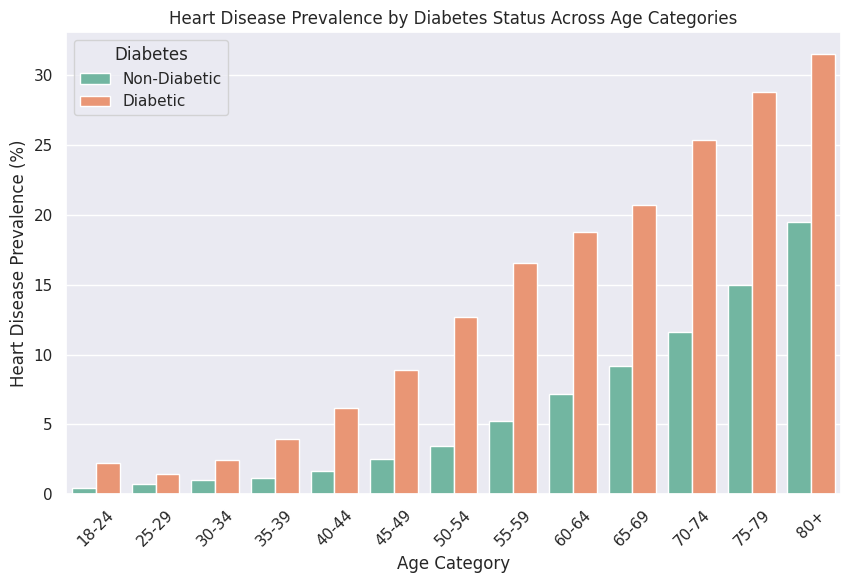

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', hue='Diabetes', data=heart_disease_age_df, palette='Set2')
plt.title('Heart Disease Prevalence by Diabetes Status Across Age Categories')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()


Diabetic individuals consistently show higher rates of heart disease across age categories, this would suggest that diabetes is a significant risk factor for heart disease, which aligns with current medical understanding.

### **2.3.2** Heart Disease and Depression

In [ ]:
# Calculate the prevalence of heart disease among individuals with depression
heart_disease_depression = data_cleaned[data_cleaned['Depression'] == 1]['Heart_Disease'].mean() * 100

# Calculate the prevalence of heart disease among individuals without depression
heart_disease_no_depression = data_cleaned[data_cleaned['Depression'] == 0]['Heart_Disease'].mean() * 100

print(f"Heart disease prevalence among individuals with depression: {heart_disease_depression:.2f}%")
print(f"Heart disease prevalence among individuals without depression: {heart_disease_no_depression:.2f}%")


Heart disease prevalence among individuals with depression: 9.86%
Heart disease prevalence among individuals without depression: 7.64%


In [ ]:
age_categories = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
heart_disease_age_data = []

for age_cat in age_categories:
    for depression_status in [0, 1]:  # 0 for No Depression, 1 for Depression
        subgroup = data_cleaned[(data_cleaned['Age_Category'] == age_cat) & (data_cleaned['Depression'] == depression_status)]
        prevalence = subgroup['Heart_Disease'].mean() * 100 if not subgroup.empty else 0
        heart_disease_age_data.append({'Age_Category': age_cat, 'Depression': 'With Depression' if depression_status == 1 else 'Without Depression', 'Heart_Disease_Prevalence': prevalence})

heart_disease_age_df = pd.DataFrame(heart_disease_age_data)


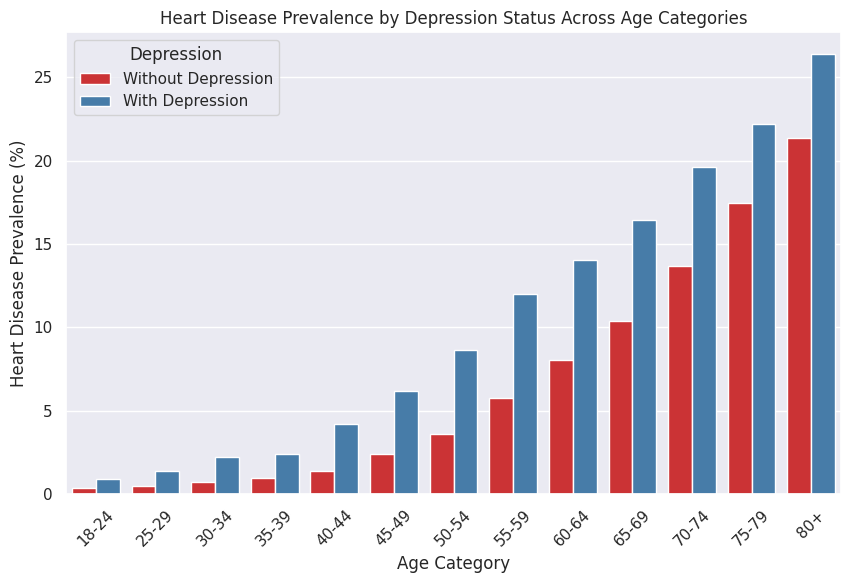

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Category', y='Heart_Disease_Prevalence', hue='Depression', data=heart_disease_age_df, palette='Set1')
plt.title('Heart Disease Prevalence by Depression Status Across Age Categories')
plt.ylabel('Heart Disease Prevalence (%)')
plt.xlabel('Age Category')
plt.xticks(rotation=45)
plt.show()


Depression individuals consistently show higher rates of heart disease across age categories, this would suggest that the comorbidity of heart disease and depression generally exists and might need hiher public attention in such phenomenon.

## **2.4** Correlation Analysis
- How exercice or diet correlates with general health or the presence of certain conditions like heart disease or diabetes.
  - Demographic analysis : how health conditions vary acrross different age group and between sex.
  - Statisical : using mean, median, average, max to get some sort of sense of the data
  - Predicve model : predict the likelyhood of certain condition


### **2.4.1** Correlation Matrix

In [ ]:
# List of non-disease factors
non_disease_factors = ['Exercise', 'Fruit_Consumption', 'Green_Vegetables_Consumption',
                       'FriedPotato_Consumption', 'Alcohol_Consumption', 'Smoking_History',
                       'Age_Num', 'Sex', "General_Health", "Checkup"]  # Add or remove factors based on your dataset

# Including 'Heart_Disease' in the analysis
columns_of_interest = ['Heart_Disease'] + non_disease_factors

# Creating a DataFrame with the selected columns
analysis_df = data_cleaned[columns_of_interest]

correlation_matrix = analysis_df.corr()


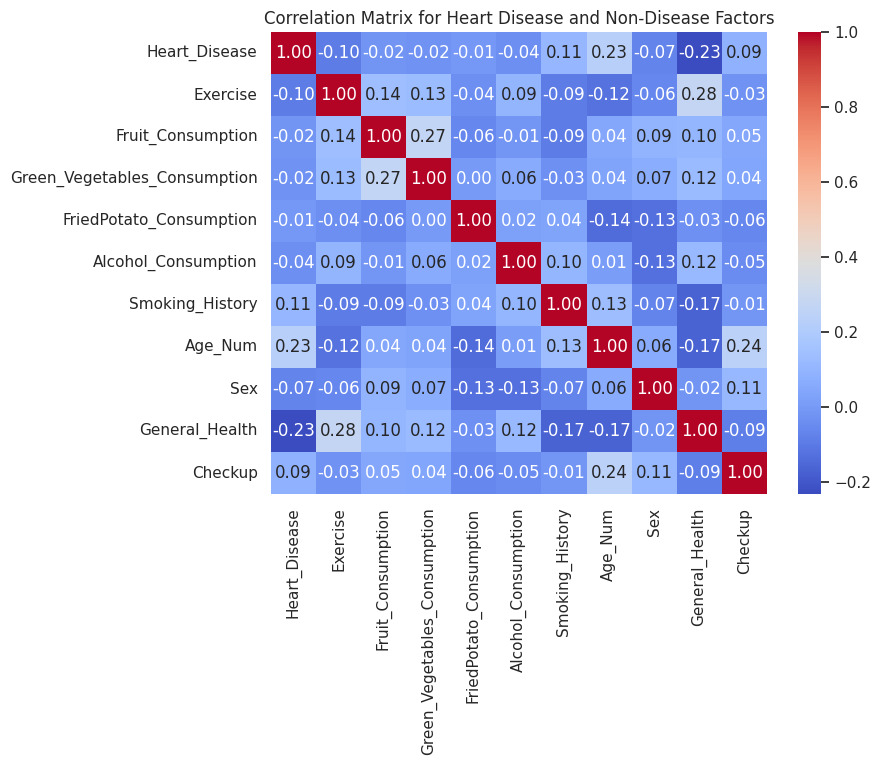

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Heart Disease and Non-Disease Factors')
plt.show()


**Takeaway**


🏃‍♂️ Exercise: There is a negative correlation (-0.10) between exercise and heart disease. This suggests that individuals who exercise more may have a lower prevalence of heart disease.

🍏 Diet Factors: Fruit, green vegetable, and fried potato consumption show very low correlations with heart disease, ranging from -0.02 to -0.01. This indicates that, based on this dataset, there is no strong direct relationship between these dietary habits and the prevalence of heart disease.

🍸 Alcohol Consumption: Alcohol consumption shows a very weak negative correlation (-0.04) with heart disease, implying no significant direct relationship between alcohol intake and heart disease prevalence.

🚬 Smoking History: There is a positive correlation (0.11) between smoking history and heart disease. This could indicate that a history of smoking is associated with a higher risk of developing heart disease.

🧓 Age: Age shows a positive correlation (0.23) with heart disease, suggesting that the risk of heart disease increases with age.

🚹 Sex: The correlation between sex and heart disease is negative (-0.07), but without additional context about the coding of the sex variable, it's difficult to draw a clear conclusion. Current correlation suggest that males in this dataset might have a slightly higher prevalence of heart disease, but this is not certain without more information.

It is important to note that correlation does not imply causation. The correlations show relationships but do not confirm that one factor causes the other. Additionally, the strength of these correlations is relatively weak, suggesting that more complex models or additional data might be necessary to fully understand the relationships between these factors and heart disease.


<ipython-input-40-4a770dbfa3d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_cleaned.corr()


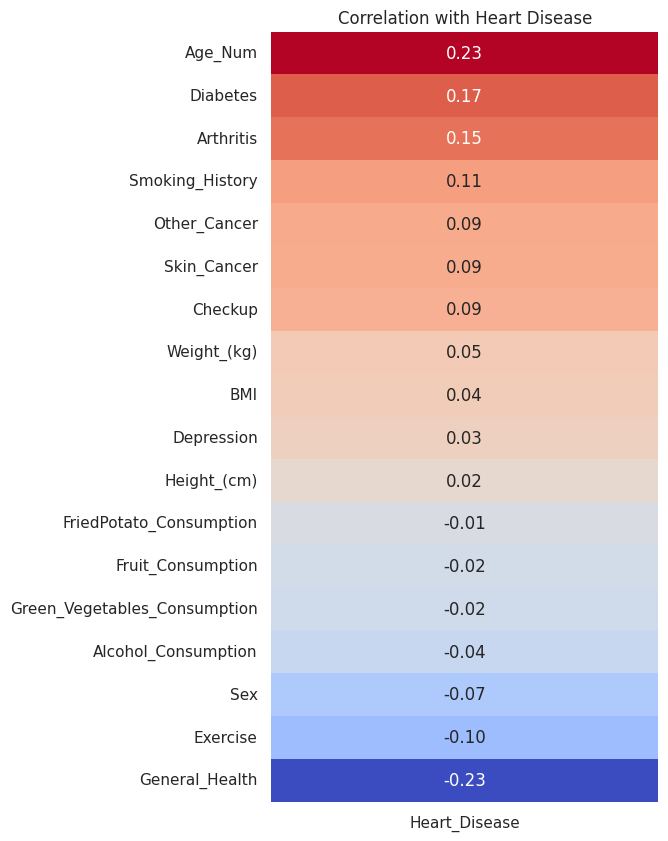

In [ ]:
# Compute the correlation matrix
corr = data_cleaned.corr()

# Select correlations for 'Heart_Disease' only
heart_disease_corr = corr['Heart_Disease'].drop('Heart_Disease')

# Optionally, exclude correlations with other disease variables
#other_diseases = ['Skin_Cancer', 'Other_Cancer', 'Diabetes']
#heart_disease_corr = heart_disease_corr.drop(other_diseases, errors='ignore')  # 'errors=ignore' handles cases where these columns might not exist

# Sort correlation values in descending order
heart_disease_corr_sorted = heart_disease_corr.sort_values(ascending=False)

# Plot a heatmap of the correlations with 'Heart_Disease'
plt.figure(figsize=(5, 10))
sns.heatmap(heart_disease_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Heart Disease')
plt.show()


📊 **Takeaway**


🧓 Age (Age_Num): With a correlation of 0.23, age is shown to have the strongest positive relationship with heart disease in this dataset, which aligns with general medical knowledge that the risk of heart disease increases with age.

🩺 Diabetes: The correlation of 0.17 indicates a significant relationship, suggesting individuals with diabetes have a higher prevalence of heart disease.

🦴 Arthritis: Shows a correlation of 0.15 with heart disease, indicating a moderate relationship.

🚬 Smoking History: With a correlation of 0.11, there is a noticeable positive relationship, meaning smoking is associated with a higher incidence of heart disease.

🔬 Cancer (Other_Cancer and Skin_Cancer): Both show correlations around 0.09 with heart disease, suggesting a slight association.

🩺 Checkup: The correlation of 0.09 is intriguing and might suggest that those with more frequent health checkups also report higher incidences of heart disease, which could be due to more frequent detection rather than a direct cause.

⚖️ Weight (Weight_kg): Shows a weaker positive correlation of 0.05, implying a slight increase in heart disease prevalence with weight.

📏 BMI: With a correlation of 0.04, there is a very weak positive relationship with heart disease.

😔 Depression: Shows a very weak positive correlation of 0.03 with heart disease.

🥔 Diet (FriedPotato_Consumption, Fruit_Consumption, Green_Vegetables_Consumption): These factors show very weak negative correlations, ranging from -0.01 to -0.02, suggesting there's no strong relationship between these dietary factors and heart disease within this dataset.

🍷 Alcohol Consumption: Has a small negative correlation of -0.04, suggesting minimal association with heart disease.

🚹 Sex: Shows a negative correlation of -0.07. Without context for the coding, it's unclear which sex this refers to, but it suggests that one sex has a slightly lower prevalence of heart disease.

🏃‍♀️ Exercise: Has a moderate negative correlation of -0.10, suggesting that individuals who exercise may have a lower prevalence of heart disease.

🏥 General Health: The strongest negative correlation at -0.23, indicating that individuals who rate their general health poorly are more likely to have heart disease.

These correlations highlight potential risk factors for heart disease, such as age and diabetes, and protective factors, like general health and exercise. However, the correlations are not strong enough to make definitive conclusions, and further analysis would be needed to control for confounding factors and to establish causation.

# **Part III:** Modelling

## **3.1** Imabalance and Metric Evaluation

### **3.1.1** Pie Chart of Data imbalance

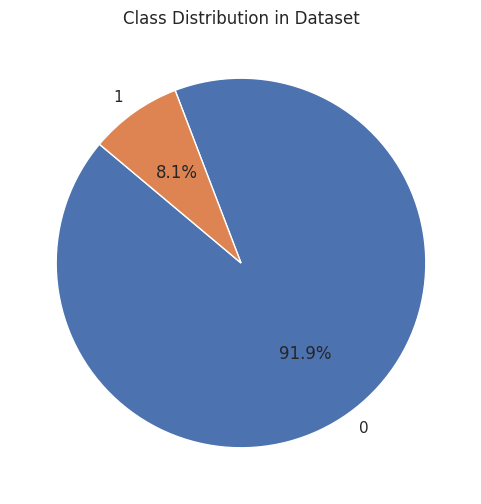

In [ ]:
import matplotlib.pyplot as plt

target_counts = data_cleaned['Heart_Disease'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Dataset')
plt.show()


📊Takweaway:

From the pie chart, we can see that our dataset imbalanced with the target variable Heart_Disease constituting only 8.1% of the data.
Such an imbalance can lead to a model that is biased towards the majority class, resulting in poor performance, especially in correctly identifying cases of heart disease.

**Solution**

To fix this issue, we can use oversampling techniques. Oversampling involves augmenting the dataset by increasing the number of instances from the underrepresented class to achieve a more balanced class distribution. There are many techniques. that we tried but we have decided that the best one was using SMOTE.

**Evaluating the Model with Appropriate Metrics**


In an imbalanced dataset, a classifier often predicts the most frequent class without really considering the features. This leads to high accuracy but doesn't truly reflect the model's performance. Therefore, we'll use recall and precision as our evaluation metrics, which are more suitable in this context. Recall measures how well the model identifies all relevant cases, while precision measures how many of the model's positive predictions are correct. These metrics give us a clearer picture of the model's effectiveness in handling unbalanced data


## **3.2** Splitting the data,Addressing class imbalance and Scalling

## **3.2.1** Splitting Data

Here, we will be splitting our data into features (X) and the target variable (y), and then into training and testing sets, in other words we are applying SMOTE.

In [ ]:
#here goes all the import
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# setup toolkits
from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()


In [ ]:
#not sure if this was one prsvioulsy but make sure it is :# Dropping the 'Age_Category' column since it was redundant
data_cleaned = data_cleaned.drop('Age_Category', axis=1)
# Ensure the conversion has been applied correctly
#print(data_cleaned['Age_Num'].head())

In [ ]:

# Assuming your target variable is 'Heart_Disease' and all other columns are features
X = data_cleaned.drop('Heart_Disease', axis=1)
y = data_cleaned['Heart_Disease']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## **3.2.2** Applying SMOTE

In [ ]:
# Oversampling using SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 216197
Samples in the resampled dataset 397434


Now, let us visualize the target variable after using SMOTE

<Axes: title={'center': 'Target variable after SMOTE'}>

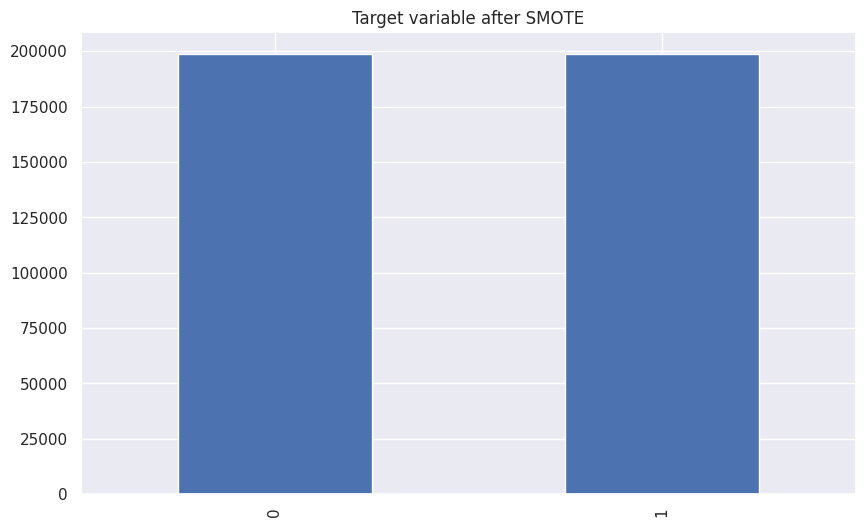

In [ ]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

## **3.2.3** Scalling

In [ ]:
# Scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

## **3.3** Data Feeding to Different Models

Now, we will feed the scalled data into different models, we will evaluate each one of them through reports following the metrics that we have discussed earlier, we will also proceed on making the models better by mean of hypertuning and others

### **3.3.1** Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

# Create and train the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_smote_scaled, y_smote)

# Evaluate the model
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)
print(classification_report(y_test, lr_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     85166
           1       0.21      0.55      0.30      7491

    accuracy                           0.79     92657
   macro avg       0.58      0.68      0.59     92657
weighted avg       0.89      0.79      0.83     92657

ROC-AUC Score: 0.7654189888961557


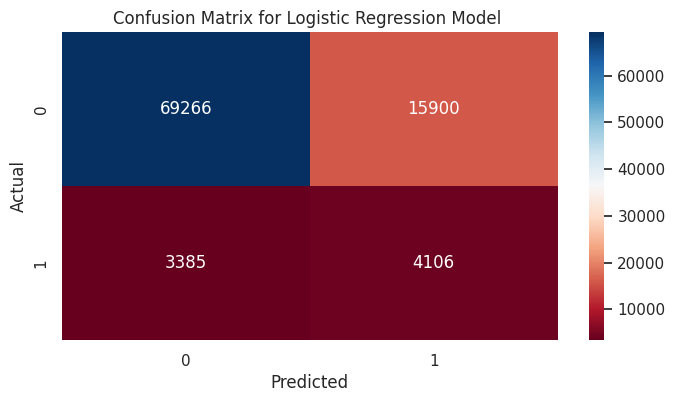

In [ ]:
log_confusion = confusion_matrix(y_test, lr_pred)
sns.set(rc={"figure.figsize":(8, 4)})
plot = sns.heatmap(log_confusion, annot = True,fmt = "g",cmap = 'RdBu')

plot.set(title = ("Confusion Matrix for Logistic Regression Model "), xlabel = "Predicted", ylabel = "Actual")
plt.show()

📊Takeaway:
Based on the report, we can see that 55% of those with heart disease are correctly predicted, whil 81% of those without heart disease are correctly predicted. Because of the data imbalance, this still gives an accuracy of 79%. As a baseline model, this model preforms relatively well and shows the tradeoff we will be facing throughout. For each model, we will have to decide how much of the recall for those without heart disease to trade off for recall of those with heart disease.

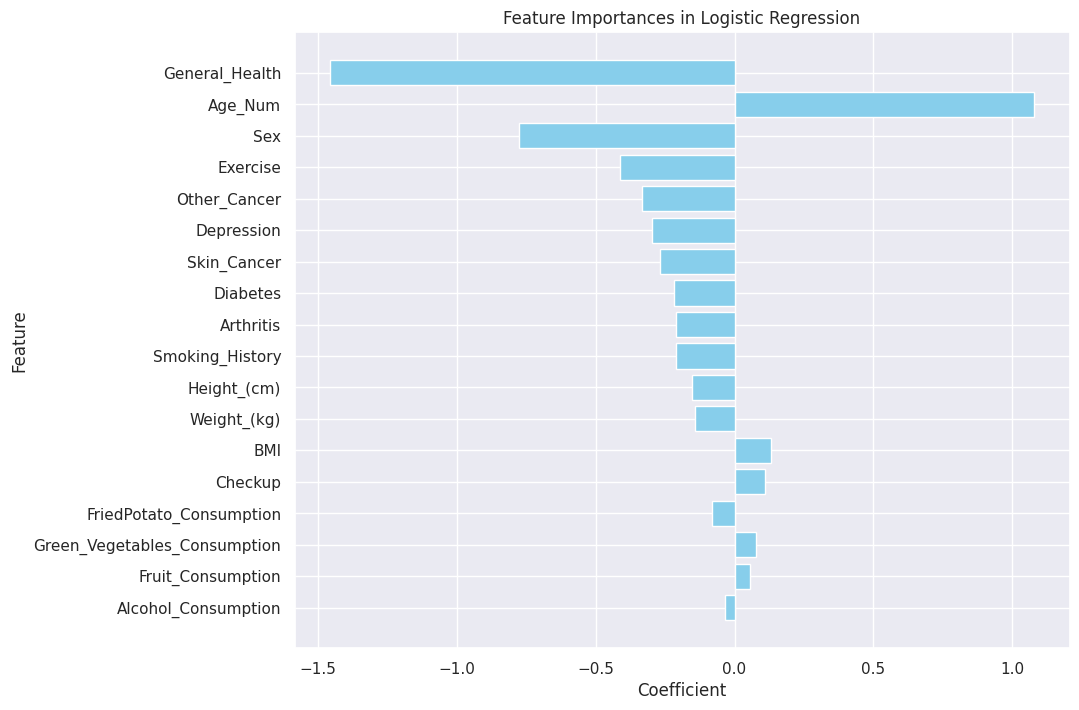

In [ ]:

import matplotlib.pyplot as plt
feature_importances_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]

})

# Sorting the DataFrame by the absolute values of coefficients
feature_importances_lr = feature_importances_lr.reindex(feature_importances_lr.Coefficient.abs().sort_values(ascending=False).index)

# Creating the bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importances_lr['Feature'], feature_importances_lr['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importances in Logistic Regression')
plt.gca().invert_yaxis()  # Inverts the Y-axis so the most important feature is at the top
plt.show()


From the coefficients of the logistic regression model, we can see what features have the largest effect. For the binary variables, we see sex has the largest effect, followed by exercise and other cancer. Specifically, all else being equal, we can see women are less likely to have heart disease along with people who exercise. Surprisingly, those with depression, cancer, diabetes, and other diseases appear less likely to have heart disease, even though we know some of these are possitively correlated with heart disease. This is probably a consequence of being correlated with general health. Since people with cancer are probably more likely to self report poor general health, and general health has such a large negative coefficient, it makes sense other diseases might have issues with interpretability due to correlation.

#### **3.3.1.1** Logistic Regression Hypertuning
After reading the article provided here:https://neptune.ai/blog/best-tools-for-model-tuning-and-hyperparameter-optimization , we came into the conculsion that the best tool to work for our data was Optuna tool. Hence we will be using it to try improving our data.
However, our result yielded to worst, with a drop in class 1

In [ ]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve


In [ ]:
def objective(trial):
    # Hyperparameters to be tuned by Optuna
    C = trial.suggest_loguniform('C', 1e-4, 1e2)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    # Model creation and training
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    model.fit(X_smote_scaled, y_smote)

    # Model evaluation
    y_pred = model.predict(X_test_scaled)
    recall = recall_score(y_test, y_pred)

    return recall


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)  # You can adjust the number of trials

print('Best trial:', study.best_trial.params)

[I 2023-12-10 20:29:23,797] A new study created in memory with name: no-name-a0bf495a-5efc-4248-a61a-b2bea52f758f
[I 2023-12-10 20:29:32,533] Trial 0 finished with value: 0.5481244159658256 and parameters: {'C': 13.815700082268648, 'solver': 'saga'}. Best is trial 0 with value: 0.5481244159658256.
[I 2023-12-10 20:29:44,199] Trial 1 finished with value: 0.5481244159658256 and parameters: {'C': 0.0789884519981293, 'solver': 'saga'}. Best is trial 0 with value: 0.5481244159658256.
[I 2023-12-10 20:29:48,320] Trial 2 finished with value: 0.5486583900680817 and parameters: {'C': 0.0019007184963385408, 'solver': 'liblinear'}. Best is trial 2 with value: 0.5486583900680817.
[I 2023-12-10 20:29:51,641] Trial 3 finished with value: 0.5498598317981578 and parameters: {'C': 0.0006409653785180462, 'solver': 'liblinear'}. Best is trial 3 with value: 0.5498598317981578.
[I 2023-12-10 20:29:54,458] Trial 4 finished with value: 0.5489253771192097 and parameters: {'C': 0.0015321026014702161, 'solver':

Best trial: {'C': 0.0006409653785180462, 'solver': 'liblinear'}


Now let us train our model with the best parameters

In [ ]:
best_model = LogisticRegression(C=0.0012387321153756541, solver='saga', max_iter=1000, random_state=42 )
best_model.fit(X_smote_scaled, y_smote)


LogisticRegression(C=0.0012387321153756541, max_iter=1000, random_state=42,
                   solver='saga')

In [ ]:
y_pred = best_model.predict(X_test_scaled)
recall = recall_score(y_test, y_pred)
print(f"Recall of the optimized model: {recall}")


Recall of the optimized model: 0.5482579094913896


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions using the optimized model
y_pred_optuna = best_model.predict(X_test_scaled)
y_pred_optuna_proba = best_model.predict_proba(X_test_scaled)

# Calculating accuracy
recall_optuna = recall_score(y_test, y_pred_optuna)
print(f"Recall of the optimized model: {recall_optuna}")

# Generating a classification report
report_optuna = classification_report(y_test, y_pred_optuna)
print("\nClassification Report for the Optimized Model:\n")
print(report_optuna)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_optuna_proba[:,1]))


Recall of the optimized model: 0.5482579094913896

Classification Report for the Optimized Model:

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     85166
           1       0.21      0.55      0.30      7491

    accuracy                           0.79     92657
   macro avg       0.58      0.68      0.59     92657
weighted avg       0.89      0.79      0.83     92657

ROC-AUC Score: 0.7658513686666428


Conclusion:
From the log of the optuna trials along with the final report, we can see that changing these hyperparameters has at most a small effect. Overall, it seems that to improve the model or increase the recall, we will need to use a different method then logistic regression.

### **3.3.2** Decision Tree

Another method for predicting heart disease is using a binary tree classifier. While it is a simple model, a benifit of this is its interpretability. A doctor or patient would be able to easily read a decision tree and decide if there is a high risk of heart disease.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the SMOTE-enhanced training set
decision_tree.fit(X_smote_scaled, y_smote)

y_pred_dt = decision_tree.predict(X_smote_scaled)
dt_test_pred = decision_tree.predict(X_test_scaled)
dt_test_pred_proba = decision_tree.predict_proba(X_test_scaled)

# Evaluating the model
print(classification_report(y_test,dt_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_test_pred_proba[:,1]))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90     85166
           1       0.18      0.31      0.23      7491

    accuracy                           0.83     92657
   macro avg       0.56      0.59      0.57     92657
weighted avg       0.87      0.83      0.85     92657

ROC-AUC Score: 0.5922465317350363


📊Takeaway:
The Decision Tree Model yields a recall score of only 0.32, and has a much lower AUC then the logistic regression model. Because there is a great deal of training data along with 18 features, the tree can be very deep and could then be over trained. With this in mind, we can tune hyperparameters in the hopes of making a simple yet useful tree.

#### **3.3.2.1** Decision Tree Hypertuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
import time

# Define a simpler parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 20, 100],
    'min_samples_leaf': [1, 5, 20, 100]
}

# Initialize GridSearchCV
dt_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_clf, param_grid, cv=3, scoring='recall', verbose=3, n_jobs=4)

# Perform grid search
start_time = time.time()
grid_search.fit(X_smote_scaled, y_smote)
print("Grid Search took {:.2f} minutes".format((time.time() - start_time) / 60))

# Print the best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
y_pred_best = best_dt_model.predict(X_test_scaled)

# Calculate and print the evaluation metrics
print("Classification Report for Best Model:\n", classification_report(y_test, y_pred_best))
print("ROC-AUC Score for Best Model:", roc_auc_score(y_test, best_dt_model.predict_proba(X_test_scaled)[:, 1]))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


📊Takeaway:

For Class 0 (No Heart Disease):

Precision (0.97): Out of all the instances where the model predicted 'No Heart Disease', 97% were actually 'No Heart Disease'. This indicates high precision - the model is very accurate when it predicts a negative outcome.
Recall (0.72): Of all the actual 'No Heart Disease' instances, the model correctly identified 72% of them. This means that it missed around 28% of the 'No Heart Disease' cases (false negatives).

For Class 1 (Heart Disease):

Precision (0.18): Only 18% of the model's predictions of 'Heart Disease' were correct. This low precision indicates that when the model predicts a positive outcome, it is often wrong (high false positives).
Recall (0.73): The model correctly identified 73% of all actual 'Heart Disease' cases. While this is a relatively high recall, indicating effectiveness in capturing most positive cases, it comes at the cost of a large number of false positives (as seen in low precision).

### **3.3.3** Random Forrest

In [ ]:
# Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Warnings
import warnings
warnings. filterwarnings('ignore')

In [ ]:
accs = []
recalls = []
precisions = []

for max_depth in range(2,10):
  rf_d = RandomForestClassifier(max_depth=max_depth)
  rf_d.fit(X_smote_scaled, y_smote)

  rf_pred_d = rf_d.predict(X_test_scaled)

  accs.append(accuracy_score(y_test, rf_pred_d))
  recalls.append(recall_score(y_test, rf_pred_d))
  precisions.append(precision_score(y_test, rf_pred_d))

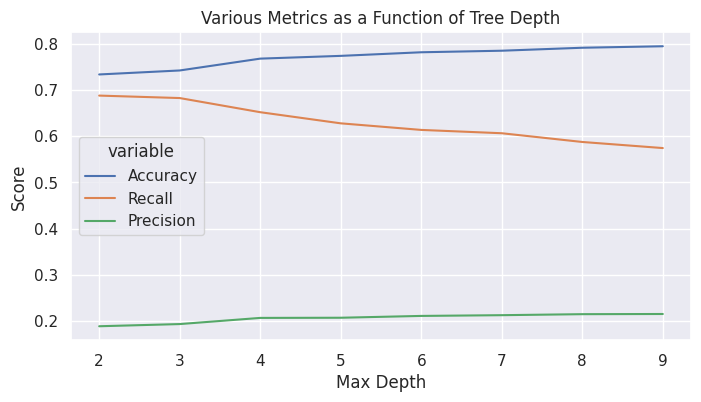

In [ ]:
rf_scores_dict = {"Max Depth": range(2,10), "Accuracy":accs, "Recall":recalls, "Precision":precisions}
df_rf_scores = pd.DataFrame(rf_scores_dict)
df_rf_scores.index = range(2,10)
sns.lineplot(x='Max Depth', y='value', hue='variable',
             data=pd.melt(df_rf_scores, ['Max Depth']))
plt.title('Various Metrics as a Function of Tree Depth')
plt.ylabel('Score')
plt.show()

From the plot above, we can see as the depth increases, the recall for "Heart_Disease" drops as the accuracy increases. This is most likelhy caused by the model predicting more and more people do not have heart disease as the model increases in complexity. Since we are worried about having a higher recall adn do not want to overfit our model, a max depth of 4 seems a reasonable choice.

In [ ]:
rf_d = RandomForestClassifier(max_depth=4)
rf_d.fit(X_smote_scaled, y_smote)

rf_pred_d = rf_d.predict(X_test_scaled)

rf_d_report = classification_report(y_test, rf_pred_d)
rf_probs = rf_d.predict_proba(X_test_scaled)[:, 1]
print("="*40, "Random forest report:", "="*45, '\n')
print(rf_d_report)
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, rf_probs)
print("AUC:", auc_score)

======================================== Random forest report: ============================================= 

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     85166
           1       0.20      0.65      0.31      7491

    accuracy                           0.76     92657
   macro avg       0.58      0.71      0.58     92657
weighted avg       0.90      0.76      0.81     92657

AUC: 0.7907114804899085


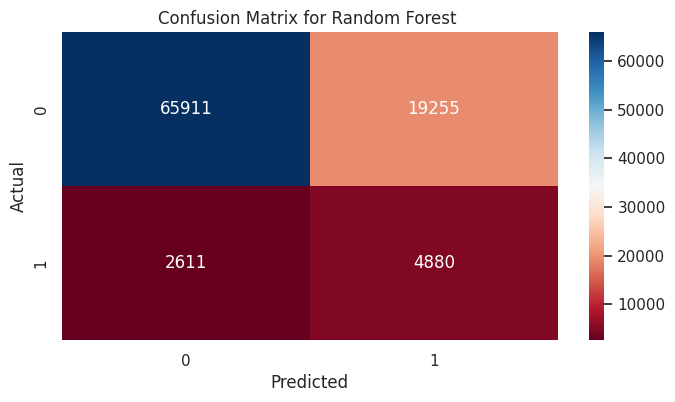

In [ ]:
rf_confusion_matrix = confusion_matrix(y_test, rf_pred_d)
sns.set(rc={"figure.figsize":(8, 4)})
plot = sns.heatmap(rf_confusion_matrix, annot = True,fmt = "g",cmap = 'RdBu')

plot.set(title = ("Confusion Matrix for Random Forest "), xlabel = "Predicted", ylabel = "Actual")

plt.show()

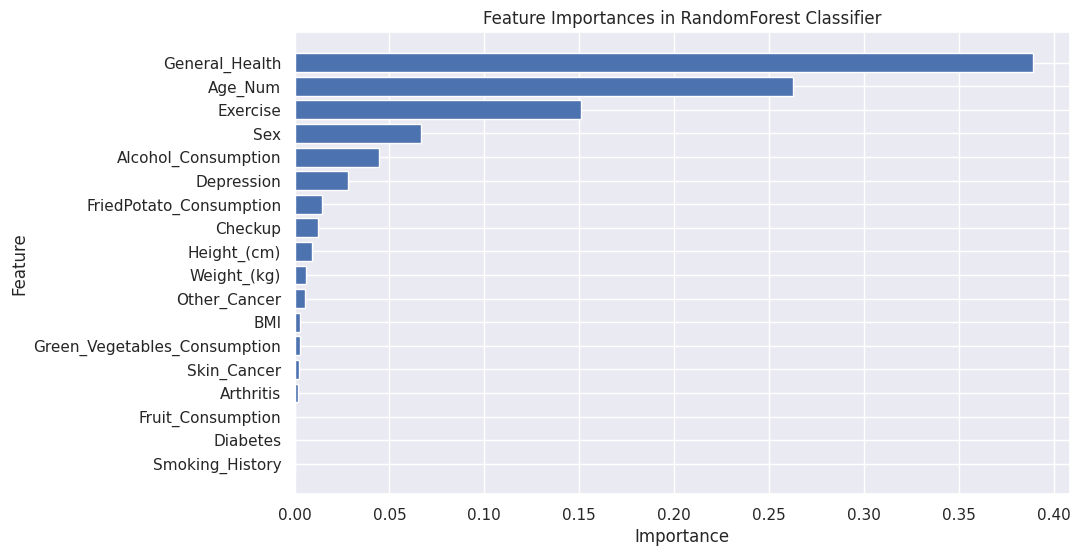

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract feature importances from the RandomForestClassifier model
importances = rf_d.feature_importances_


# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in RandomForest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


We can see the random forest model has a tradeoff between the recall for those with heart disease and the recall for those without it. While this model is able to correctly precict almost 60% of people with heart disease, it then incorrectly predicts about 25% of those without heart disease. Because of the increase in recall for those with heart disease, this still is in many ways an improvement of the decision tree, but comes at the added cost of complexity and false positives.

### **3.3.4** XG Boost

In [ ]:
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_smote_scaled, y_smote)

# Predicting on the test set
xgb_test_pred = xgb_model.predict(X_test_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, xgb_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1]))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     85166
           1       0.31      0.17      0.22      7491

    accuracy                           0.90     92657
   macro avg       0.62      0.57      0.58     92657
weighted avg       0.88      0.90      0.89     92657

ROC-AUC Score: 0.8073819104495035


#### **3.3.4.1** XG Boost Hypertuning

In [ ]:
pip install bayesian-optimization

In [ ]:
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the XGBoost optimization function
def xgb_evaluate(max_depth, learning_rate, n_estimators, gamma, min_child_weight, max_delta_step, subsample, colsample_bytree):
    params = {
    'max_depth': 6,  # Shallower tree
    'n_estimators': 300,  # More trees
    'learning_rate': 0.05,  # Smaller learning rate
    'min_child_weight': 3,  # Higher than default
    'scale_pos_weight': (len(y_smote) - sum(y_smote)) / sum(y_smote),  # Adjusted for imbalance
    'objective': 'binary:logistic'
              }
    xgb = XGBClassifier(**params, random_state=42)
    cv_score = np.mean(cross_val_score(xgb, X_smote_scaled, y_smote, cv=3, scoring='recall'))
    return cv_score

# Define the parameter bounds
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 400),
    'gamma': (0, 5),
    'min_child_weight': (0, 10),
    'max_delta_step': (0, 10),
    'subsample': (0.7, 1.0),
    'colsample_bytree': (0.7, 1.0)
}

# Apply Bayesian Optimization
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=2, n_iter=5)

# Print the best parameters
best_params = optimizer.max['params']
print("Best parameters found: ", best_params)


|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8941    | 0.8124    | 4.754     | 0.2223    | 5.987     | 4.092     | 1.56      | 70.33     | 0.9599    |
| 2         | 0.8941    | 0.8803    | 3.54      | 0.01597   | 9.699     | 8.827     | 2.123     | 113.6     | 0.755     |
| 3         | 0.8941    | 0.8406    | 2.074     | 0.08929   | 0.5638    | 9.053     | 8.129     | 399.9     | 0.999     |
| 4         | 0.8941    | 0.9223    | 4.157     | 0.1557    | 9.581     | 4.066     | 2.956     | 399.1     | 0.75      |
| 5         | 0.8941    | 0.9299    | 4.515     | 0.2791    | 0.01636   | 9.462     | 9.475     | 50.71     | 0.7036    |
| 6         | 0.8941    | 0.7914    | 3.085     | 0.1486    | 9.437     | 3.216     | 0.8917    | 399.9     | 0.9469    |
| 7         | 0.8941    

In [ ]:
# Convert necessary parameters to integers
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the XGBoost model with the best parameters
optimized_xgb = XGBClassifier(**best_params, objective='binary:logistic', random_state=42)

# Train the model on the SMOTE-enhanced and scaled training set
optimized_xgb.fit(X_smote_scaled, y_smote)

# Predicting on the test set
xgb_test_pred = optimized_xgb.predict(X_test_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, xgb_test_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, optimized_xgb.predict_proba(X_test_scaled)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     85166
           1       0.26      0.30      0.28      7491

    accuracy                           0.87     92657
   macro avg       0.60      0.61      0.60     92657
weighted avg       0.88      0.87      0.88     92657

ROC-AUC Score: 0.7890289481006434


📊Takeaway:

For Class 0 (No Heart Disease):

Precision (0.94): The model is highly precise in predicting 'No Heart Disease'; 94% of its predictions for this class are correct.
Recall (0.92): The model correctly identifies 92% of the actual 'No Heart Disease' cases. This is a high recall, indicating the model is effective in detecting the majority class.

For Class 1 (Heart Disease):

Precision (0.25): Only 25% of the model's predictions of 'Heart Disease' were correct. This relatively low precision means there are quite a few false positives.
Recall (0.30): The model correctly identifies 30% of the actual 'Heart Disease' cases. This indicates that 70% of the true 'Heart Disease' cases are missed (false negatives).

## **3.4** Conlclusion for Modelling

If we consider not missing actual positive cases (true class 1), then recall is our metric, and random forrest seems best. However, it also has a lot of false positives (low precision). The AUC of 0.795 for model 4 suggests that this model, despite having a lower precision, is better at distinguishing between positive and negative classes compared to the others.

If the goal is to prioritize catching as many true positives as possible (high recall), random forrest looks favorable. If the aim is to maintain a balance between precision and recall, logistic regression might be more appropriate.

XG Boost seems to be the most conservative, with a relatively high accuracy and a balanced approach to precision and recall.







# **Part IV:** Conclusion

Overall, we were able to create a reasonably good model for the heart disease data. Or decision tree model is easily interpretable and could be used simply by doctors to decide who might need a screening. Depending on if recall or precision is seen as more valuable, the random forest model and the XGBoost model can be decided between. While these are not as interpretable, their ability to tell who does and does not have heart disease is much stronger then the decision tree.

The models, including logistic regression, also tell us what features are more important for heart disease. We can see general health, age, and sex are extremely important and are mostly out of our control. That being said, we can also see from the random forest and logisitic regression models that exercise, alcohol consumption, and fried potato consumption are important features which people can control. One way to reduce heart disease then is to incourage people to exercise more and lower consumption of alcohol and fried foods, possibly through a tax.